In [1]:
import numpy as np
import jax.numpy as jnp
import jax
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import rho_plus as rp

is_dark = False
theme, cs = rp.mpl_setup(is_dark)
rp.plotly_setup(is_dark)

In [3]:
%cd ~/avid

/home/nmiklaucic/avid


In [6]:
from pathlib import Path
import pyrallis
from avid.config import MainConfig
import orbax.checkpoint as ocp

from avid.training_state import TrainingRun
from avid.checkpointing import best_ckpt

# run_dir = Path('logs') / '03-17:45_918'
# run_dir = Path('logs') / 'e_form_no_downsample_564'
# run_dir = Path('logs') / 'e_form_equivariant_patch_235'
# run_dir = Path('logs') / '04-13-interrupted-919'
# run_dir = Path('logs') / '04-13-14_650'
run_dir = Path('logs') / '04-25-22_88'

with open(run_dir / 'config.toml') as conf_file:
    config = pyrallis.cfgparsing.load(MainConfig, conf_file)

model = config.build_regressor()

ckpt = best_ckpt(run_dir)
ckpt = jax.tree.map(lambda x: x if isinstance(x, (float, int)) else x.astype(jnp.bfloat16), ckpt)
model = model.bind(ckpt['state']['params'])

Configured `CheckpointManager` using deprecated legacy API. Please follow the instructions at                      
https://orbax.readthedocs.io/en/latest/api_refactor.html to migrate by May 1st, 2024.

Given directory is read only=/home/nmiklaucic/avid/logs/04-25-22_886/final_ckpt/ckpts

Restoring item from /home/nmiklaucic/avid/logs/04-25-22_886/final_ckpt/ckpts/7599.

Finished restoring checkpoint from /home/nmiklaucic/avid/logs/04-25-22_886/final_ckpt/ckpts/7599.

In [4]:
from avid.utils import debug_structure, debug_stat
params = ckpt['state']['params']['params']
debug_structure(params);
debug_stat(params);

arg0
├── diffusion >>> backbone
│   ├── aby_scale
│   │   └── bfloat16[6]
│   ├── condition_mlp
│   │   ├── Dense_0
│   │   │   ├── bias
│   │   │   │   └── bfloat16[256]
│   │   │   └── kernel
│   │   │       └── bfloat16[256, 256]
│   │   ├── Dense_1
│   │   │   ├── bias
│   │   │   │   └── bfloat16[2304]
│   │   │   └── kernel
│   │   │       └── bfloat16[256, 2304]
│   │   └── LayerNorm_0
│   │       ├── bias
│   │       │   └── bfloat16[256]
│   │       └── scale
│   │           └── bfloat16[256]
│   ├── encoder
│   │   ├── encoder_norm
│   │   │   ├── bias
│   │   │   │   └── bfloat16[384]
│   │   │   └── scale
│   │   │       └── bfloat16[384]
│   │   ├── encoderblock_0
│   │   │   ├── EquivariantMHA_0
│   │   │   │   ├── key
│   │   │   │   │   └── {...}
│   │   │   │   ├── key_ln
│   │   │   │   │   └── {...}
│   │   │   │   ├── out
│   │   │   │   │   └── {...}
│   │   │   │   ├── query
│   │   │   │   │   └── {...}
│   │   │   │   ├── query_ln
│   │   │   │   │   └── {...}
│   │   │   │   ├── relative_attn
│   │   │   │   │   └── bfloat16[35, 6]
│   │   │   │   └── value
│   │   │   │       └── {...}
│   │   │   ├── LayerNorm_0
│   │   │   │   ├── bias
│   │   │   │   │   └── bfloat16[384]
│   │   │   │   └── scale
│   │   │   │       └── bfloat16[384]
│   │   │   ├── LayerNorm_1
│   │   │   │   ├── bias
│   │   │   │   │   └── bfloat16[384]
│   │   │   │   └── scale
│   │   │   │       └── bfloat16[384]
│   │   │   └── LazyInMLP_0 >>> Dense_0
│   │   │       ├── bias
│   │   │       │   └── bfloat16[384]
│   │   │       └── kernel
│   │   │           └── bfloat16[384, 384]
│   │   ├── encoderblock_1
│   │   │   ├── EquivariantMHA_0
│   │   │   │   ├── key
│   │   │   │   │   └── {...}
│   │   │   │   ├── key_ln
│   │   │   │   │   └── {...}
│   │   │   │   ├── out
│   │   │   │   │   └── {...}
│   │   │   │   ├── query
│   │   │   │   │   └── {...}
│   │   │   │   ├── query_ln
│   │   │   │   │   └── {...}
│   │   │   │   ├── relative_attn
│   │   │   │   │   └── bfloat16[35, 6]
│   │   │   │   └── value
│   │   │   │       └── {...}
│   │   │   ├── LayerNorm_0
│   │   │   │   ├── bias
│   │   │   │   │   └── bfloat16[384]
│   │   │   │   └── scale
│   │   │   │       └── bfloat16[384]
│   │   │   ├── LayerNorm_1
│   │   │   │   ├── bias
│   │   │   │   │   └── bfloat16[384]
│   │   │   │   └── scale
│   │   │   │       └── bfloat16[384]
│   │   │   └── LazyInMLP_0 >>> Dense_0
│   │   │       ├── bias
│   │   │       │   └── bfloat16[384]
│   │   │       └── kernel
│   │   │           └── bfloat16[384, 384]
│   │   ├── encoderblock_2
│   │   │   ├── EquivariantMHA_0
│   │   │   │   ├── key
│   │   │   │   │   └── {...}
│   │   │   │   ├── key_ln
│   │   │   │   │   └── {...}
│   │   │   │   ├── out
│   │   │   │   │   └── {...}
│   │   │   │   ├── query
│   │   │   │   │   └── {...}
│   │   │   │   ├── query_ln
│   │   │   │   │   └── {...}
│   │   │   │   ├── relative_attn
│   │   │   │   │   └── bfloat16[35, 6]
│   │   │   │   └── value
│   │   │   │       └── {...}
│   │   │   ├── LayerNorm_0
│   │   │   │   ├── bias
│   │   │   │   │   └── bfloat16[384]
│   │   │   │   └── scale
│   │   │   │       └── bfloat16[384]
│   │   │   ├── LayerNorm_1
│   │   │   │   ├── bias
│   │   │   │   │   └── bfloat16[384]
│   │   │   │   └── scale
│   │   │   │       └── bfloat16[384]
│   │   │   └── LazyInMLP_0 >>> Dense_0
│   │   │       ├── bias
│   │   │       │   └── bfloat16[384]
│   │   │       └── kernel
│   │   │           └── bfloat16[384, 384]
│   │   └── encoderblock_3
│   │       ├── EquivariantMHA_0
│   │       │   ├── key
│   │       │   │   └── {...}
│   │       │   ├── key_ln
│   │       │   │   └── {...}
│   │       │   ├── out
│   │       │   │   └── {...}
│   │       │   ├── query
│   │       │   │   └── {...}
│   │       │   ├── query_ln
│   │       │   │   └── {...}
│   │       │   ├── relative_attn
│   │       │   │   └── bfloat16[35, 6]
│   │       │   └── value
│   │       │       └── {...}
│   │       

arg0
├── diffusion >>> backbone
│   ├── aby_scale
│   │   └── -0.0004
│   ├── condition_mlp
│   │   ├── Dense_0
│   │   │   ├── bias
│   │   │   │   └── -0.0081
│   │   │   └── kernel
│   │   │       └── -0.0003
│   │   ├── Dense_1
│   │   │   ├── bias
│   │   │   │   └── 0.0004
│   │   │   └── kernel
│   │   │       └── 0.0001
│   │   └── LayerNorm_0
│   │       ├── bias
│   │       │   └── 0.0035
│   │       └── scale
│   │           └── 0.0414
│   ├── encoder
│   │   ├── encoder_norm
│   │   │   ├── bias
│   │   │   │   └── 0.0000
│   │   │   └── scale
│   │   │       └── 1.0078
│   │   ├── encoderblock_0
│   │   │   ├── EquivariantMHA_0
│   │   │   │   ├── key
│   │   │   │   │   └── {...}
│   │   │   │   ├── key_ln
│   │   │   │   │   └── {...}
│   │   │   │   ├── out
│   │   │   │   │   └── {...}
│   │   │   │   ├── query
│   │   │   │   │   └── {...}
│   │   │   │   ├── query_ln
│   │   │   │   │   └── {...}
│   │   │   │   ├── relative_attn
│   │   │   │   │   └── -0.0153
│   │   │   │   └── value
│   │   │   │       └── {...}
│   │   │   ├── LayerNorm_0
│   │   │   │   ├── bias
│   │   │   │   │   └── 0.0004
│   │   │   │   └── scale
│   │   │   │       └── 0.0033
│   │   │   ├── LayerNorm_1
│   │   │   │   ├── bias
│   │   │   │   │   └── 0.0017
│   │   │   │   └── scale
│   │   │   │       └── -0.0008
│   │   │   └── LazyInMLP_0 >>> Dense_0
│   │   │       ├── bias
│   │   │       │   └── 0.0002
│   │   │       └── kernel
│   │   │           └── -0.0001
│   │   ├── encoderblock_1
│   │   │   ├── EquivariantMHA_0
│   │   │   │   ├── key
│   │   │   │   │   └── {...}
│   │   │   │   ├── key_ln
│   │   │   │   │   └── {...}
│   │   │   │   ├── out
│   │   │   │   │   └── {...}
│   │   │   │   ├── query
│   │   │   │   │   └── {...}
│   │   │   │   ├── query_ln
│   │   │   │   │   └── {...}
│   │   │   │   ├── relative_attn
│   │   │   │   │   └── -0.0146
│   │   │   │   └── value
│   │   │   │       └── {...}
│   │   │   ├── LayerNorm_0
│   │   │   │   ├── bias
│   │   │   │   │   └── 0.0006
│   │   │   │   └── scale
│   │   │   │       └── 0.0023
│   │   │   ├── LayerNorm_1
│   │   │   │   ├── bias
│   │   │   │   │   └── 0.0008
│   │   │   │   └── scale
│   │   │   │       └── 0.0054
│   │   │   └── LazyInMLP_0 >>> Dense_0
│   │   │       ├── bias
│   │   │       │   └── 0.0003
│   │   │       └── kernel
│   │   │           └── -0.0002
│   │   ├── encoderblock_2
│   │   │   ├── EquivariantMHA_0
│   │   │   │   ├── key
│   │   │   │   │   └── {...}
│   │   │   │   ├── key_ln
│   │   │   │   │   └── {...}
│   │   │   │   ├── out
│   │   │   │   │   └── {...}
│   │   │   │   ├── query
│   │   │   │   │   └── {...}
│   │   │   │   ├── query_ln
│   │   │   │   │   └── {...}
│   │   │   │   ├── relative_attn
│   │   │   │   │   └── -0.0078
│   │   │   │   └── value
│   │   │   │       └── {...}
│   │   │   ├── LayerNorm_0
│   │   │   │   ├── bias
│   │   │   │   │   └── 0.0004
│   │   │   │   └── scale
│   │   │   │       └── 0.0024
│   │   │   ├── LayerNorm_1
│   │   │   │   ├── bias
│   │   │   │   │   └── 0.0010
│   │   │   │   └── scale
│   │   │   │       └── 0.0011
│   │   │   └── LazyInMLP_0 >>> Dense_0
│   │   │       ├── bias
│   │   │       │   └── 0.0004
│   │   │       └── kernel
│   │   │           └── -0.0000
│   │   └── encoderblock_3
│   │       ├── EquivariantMHA_0
│   │       │   ├── key
│   │       │   │   └── {...}
│   │       │   ├── key_ln
│   │       │   │   └── {...}
│   │       │   ├── out
│   │       │   │   └── {...}
│   │       │   ├── query
│   │       │   │   └── {...}
│   │       │   ├── query_ln
│   │       │   │   └── {...}
│   │       │   ├── relative_attn
│   │       │   │   └── -0.0043
│   │       │   └── value
│   │       │       └── {...}
│   │       ├── LayerNorm_0
│   │       │   ├── bias
│   │       │   │   └── 0.0002
│   │       │   └── scale
│   │       │       └── 0.0038
│   │       ├── LayerNorm_1
│   │       │   ├── bias
│   │       │   │   └── 0.0013
│   │       │   └── scale


In [7]:
from avid.utils import ELEM_VALS
spec_emb = params['spec_embed']['species_embed']['species_embed']['embedding'].astype(jnp.float32)

spec_df = pd.DataFrame(spec_emb, index=ELEM_VALS)
spec_df.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
Li,0.064941,0.029297,-0.496094,-0.060791,-0.173828,-0.029907,0.057129,-0.014648,0.011597,0.035645,...,0.137695,-0.027710,0.010071,0.036621,-0.094238,0.041992,-0.089355,0.004211,-0.055420,-0.090332
Be,0.105957,0.009521,-0.142578,0.030396,-0.154297,-0.166992,0.152344,-0.066406,0.114258,0.005707,...,0.121582,-0.013611,-0.004395,0.016357,-0.187500,0.051514,-0.008667,0.261719,-0.132812,-0.071289
B,0.008972,-0.028320,-0.064453,-0.029663,-0.036621,-0.083008,-0.007050,-0.004944,0.032959,-0.031738,...,0.034180,0.028931,-0.007355,0.032227,-0.030273,-0.024658,-0.028931,0.124512,-0.030151,0.010071
N,-0.007721,-0.116699,0.102539,-0.026855,-0.014221,-0.011230,0.009094,0.003098,-0.015320,-0.023926,...,-0.554688,-0.024170,-0.001114,-0.011780,-0.001129,-0.008484,-0.006012,0.007996,-0.012512,0.257812
O,-0.001274,-0.012451,0.061768,0.059326,0.096191,0.030884,-0.007751,-0.018677,0.031250,0.024902,...,-0.051270,-0.012878,0.006042,0.009155,-0.009521,-0.035400,-0.010071,0.017578,-0.020874,0.030029


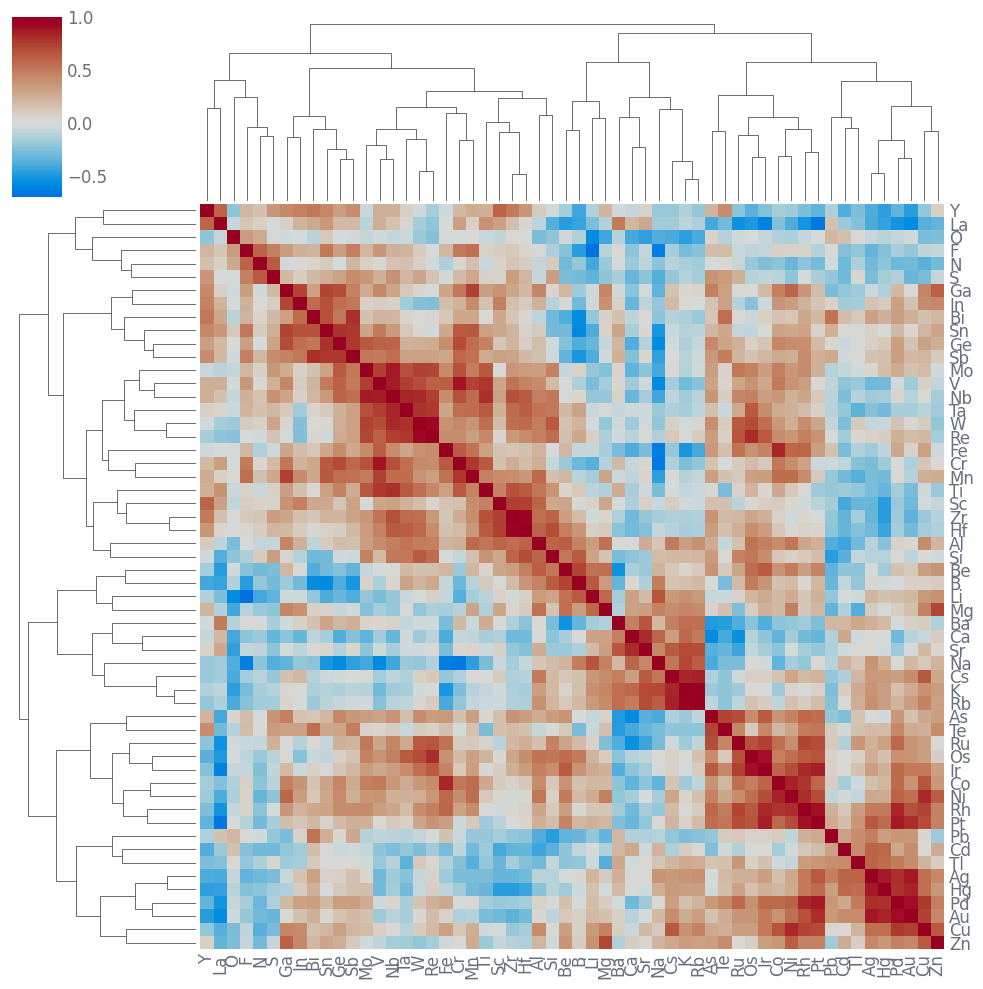

In [8]:
sns.clustermap(spec_df.T.corr(), xticklabels=1, yticklabels=1, cmap='rho_diverging', center=0)

In [9]:
# debug_stat(params['mixer']['EquivariantMixerMLP_0']);
debug_structure(params['Encoder_0']['encoderblock_0']['EquivariantMHA_0']);

arg0
├── key
│   ├── bias
│   │   └── bfloat16[12, 32]
│   └── kernel
│       └── bfloat16[384, 12, 32]
├── key_ln >>> scale
│   └── bfloat16[32]
├── out
│   ├── bias
│   │   └── bfloat16[384]
│   └── kernel
│       └── bfloat16[12, 32, 384]
├── query
│   ├── bias
│   │   └── bfloat16[12, 32]
│   └── kernel
│       └── bfloat16[384, 12, 32]
├── query_ln >>> scale
│   └── bfloat16[32]
├── relative_attn
│   └── bfloat16[35, 12]
└── value
    ├── bias
    │   └── bfloat16[12, 32]
    └── kernel
        └── bfloat16[384, 12, 32]

<Axes: >

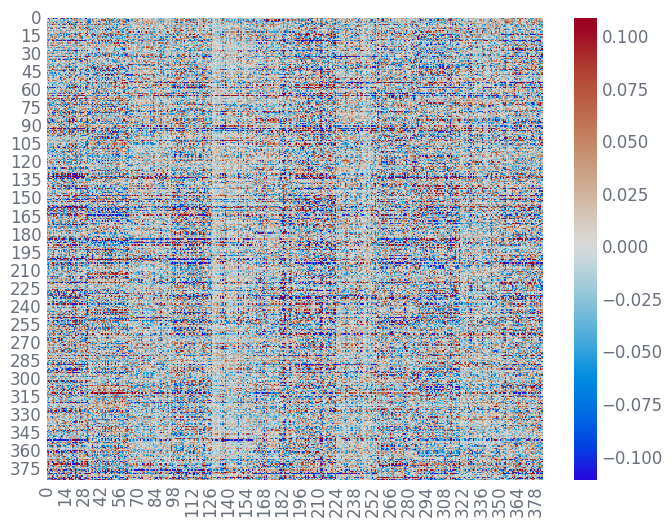

In [12]:
# sns.heatmap(params['head']['Dense_0']['kernel'], center=0, cmap='rho_diverging')
mat = params['Encoder_0']['encoderblock_0']['EquivariantMHA_0']['query']['kernel'].astype(jnp.float32)
sns.heatmap(mat.reshape(mat.shape[0], mat.shape[0]), center=0, cmap='rho_diverging', robust=True)

<Axes: ylabel='Density'>

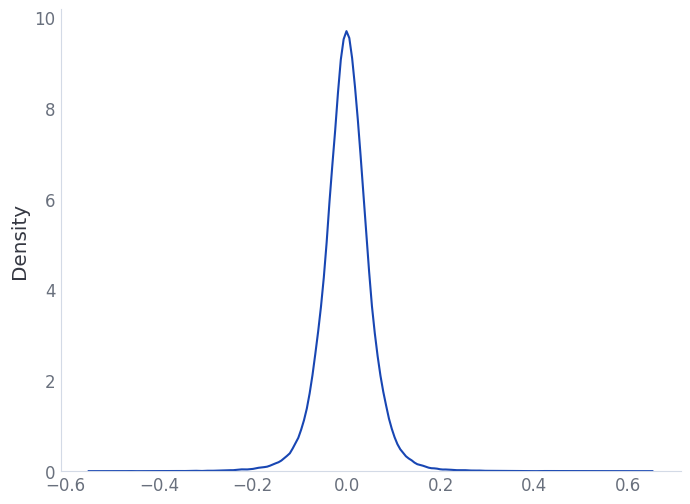

In [13]:
sns.kdeplot(mat.reshape(-1))

In [14]:
from umap import UMAP
import plotly.express as px

umap = UMAP(n_neighbors=15, metric='euclidean')

spec_df[['x', 'y']] = umap.fit_transform(spec_df.iloc[:64].values)

spec_df.columns = [str(c) for c in spec_df.columns]
px.scatter(spec_df.reset_index(), x='x', y='y', text='index', width=800, height=800, opacity=0)

In [15]:
debug_structure(params);

arg0
├── Encoder_0
│   ├── encoder_norm
│   │   ├── bias
│   │   │   └── bfloat16[384]
│   │   └── scale
│   │       └── bfloat16[384]
│   ├── encoderblock_0
│   │   ├── EquivariantMHA_0
│   │   │   ├── key
│   │   │   │   ├── bias
│   │   │   │   │   └── bfloat16[12, 32]
│   │   │   │   └── kernel
│   │   │   │       └── bfloat16[384, 12, 32]
│   │   │   ├── key_ln >>> scale
│   │   │   │   └── bfloat16[32]
│   │   │   ├── out
│   │   │   │   ├── bias
│   │   │   │   │   └── bfloat16[384]
│   │   │   │   └── kernel
│   │   │   │       └── bfloat16[12, 32, 384]
│   │   │   ├── query
│   │   │   │   ├── bias
│   │   │   │   │   └── bfloat16[12, 32]
│   │   │   │   └── kernel
│   │   │   │       └── bfloat16[384, 12, 32]
│   │   │   ├── query_ln >>> scale
│   │   │   │   └── bfloat16[32]
│   │   │   ├── relative_attn
│   │   │   │   └── bfloat16[35, 12]
│   │   │   └── value
│   │   │       ├── bias
│   │   │       │   └── bfloat16[12, 32]
│   │   │       └── kernel
│   │   │           └── bfloat16[384, 12, 32]
│   │   ├── LayerNorm_0
│   │   │   ├── bias
│   │   │   │   └── bfloat16[384]
│   │   │   └── scale
│   │   │       └── bfloat16[384]
│   │   ├── LayerNorm_1
│   │   │   ├── bias
│   │   │   │   └── bfloat16[384]
│   │   │   └── scale
│   │   │       └── bfloat16[384]
│   │   └── LazyInMLP_0 >>> Dense_0
│   │       ├── bias
│   │       │   └── bfloat16[384]
│   │       └── kernel
│   │           └── bfloat16[384, 384]
│   ├── encoderblock_1
│   │   ├── EquivariantMHA_0
│   │   │   ├── key
│   │   │   │   ├── bias
│   │   │   │   │   └── bfloat16[12, 32]
│   │   │   │   └── kernel
│   │   │   │       └── bfloat16[384, 12, 32]
│   │   │   ├── key_ln >>> scale
│   │   │   │   └── bfloat16[32]
│   │   │   ├── out
│   │   │   │   ├── bias
│   │   │   │   │   └── bfloat16[384]
│   │   │   │   └── kernel
│   │   │   │       └── bfloat16[12, 32, 384]
│   │   │   ├── query
│   │   │   │   ├── bias
│   │   │   │   │   └── bfloat16[12, 32]
│   │   │   │   └── kernel
│   │   │   │       └── bfloat16[384, 12, 32]
│   │   │   ├── query_ln >>> scale
│   │   │   │   └── bfloat16[32]
│   │   │   ├── relative_attn
│   │   │   │   └── bfloat16[35, 12]
│   │   │   └── value
│   │   │       ├── bias
│   │   │       │   └── bfloat16[12, 32]
│   │   │       └── kernel
│   │   │           └── bfloat16[384, 12, 32]
│   │   ├── LayerNorm_0
│   │   │   ├── bias
│   │   │   │   └── bfloat16[384]
│   │   │   └── scale
│   │   │       └── bfloat16[384]
│   │   ├── LayerNorm_1
│   │   │   ├── bias
│   │   │   │   └── bfloat16[384]
│   │   │   └── scale
│   │   │       └── bfloat16[384]
│   │   └── LazyInMLP_0 >>> Dense_0
│   │       ├── bias
│   │       │   └── bfloat16[384]
│   │       └── kernel
│   │           └── bfloat16[384, 384]
│   ├── encoderblock_2
│   │   ├── EquivariantMHA_0
│   │   │   ├── key
│   │   │   │   ├── bias
│   │   │   │   │   └── bfloat16[12, 32]
│   │   │   │   └── kernel
│   │   │   │       └── bfloat16[384, 12, 32]
│   │   │   ├── key_ln >>> scale
│   │   │   │   └── bfloat16[32]
│   │   │   ├── out
│   │   │   │   ├── bias
│   │   │   │   │   └── bfloat16[384]
│   │   │   │   └── kernel
│   │   │   │       └── bfloat16[12, 32, 384]
│   │   │   ├── query
│   │   │   │   ├── bias
│   │   │   │   │   └── bfloat16[12, 32]
│   │   │   │   └── kernel
│   │   │   │       └── bfloat16[384, 12, 32]
│   │   │   ├── query_ln >>> scale
│   │   │   │   └── bfloat16[32]
│   │   │   ├── relative_attn
│   │   │   │   └── bfloat16[35, 12]
│   │   │   └── value
│   │   │       ├── bias
│   │   │       │   └── bfloat16[12, 32]
│   │   │       └── kernel
│   │   │           └── bfloat16[384, 12, 32]
│   │   ├── LayerNorm_0
│   │   │   ├── bias
│   │   │   │   └── bfloat16[384]
│   │   │   └── scale
│   │   │       └── bfloat16[384]
│   │   ├── LayerNorm_1
│   │   │   ├── bias
│   │   │   │   └── bfloat16[384]
│   │   │   └── scale
│   │   │       └── bfloat16[384]
│   │   └── LazyInMLP_0 >>> Dense_0
│   │       ├── bias
│   │       │   └── bf

In [16]:
import functools as ft
from einops import rearrange, reduce

N_GRID = 24

grid_vals = jnp.linspace(0, 1, N_GRID + 1)[:-1]

xx, yy, zz = jnp.meshgrid(grid_vals, grid_vals, grid_vals)
xyz = rearrange(jnp.array([xx, yy, zz]), 'd n1 n2 n3 -> (n1 n2 n3) d')


cmap = rp.list_div_coolwarm

def plot(dens, n_skip=2, thresh=0.1, cmap='auto'):
    bg_mask = abs(dens) > thresh
    skip_mask = jnp.all(jnp.round(xyz * N_GRID) % n_skip == 0, axis=1)
    mask = skip_mask & bg_mask
    color_args = {
        'color_continuous_scale': cmap
    }
    if jnp.mean(dens < 0) > 0.1:
        color_args['color_continuous_midpoint'] = 0
        if color_args['color_continuous_scale'] == 'auto':
            color_args['color_continuous_scale'] = rp.list_div_icefire if is_dark else rp.list_div_coolwarm
    else:
        if color_args['color_continuous_scale'] == 'auto':
            color_args['color_continuous_scale'] = rp.list_inferna if is_dark else rp.list_inferna_r
    return px.scatter_3d(
        x=xyz[mask, 0],
        y=xyz[mask, 1],
        z=xyz[mask, 2],
        color=dens[mask],
        # color=np.array(species[mask]).astype('str'),
        range_x=[0, 1], range_y=[0, 1], range_z=[0, 1],
        opacity=1,
        **color_args
    )

In [17]:
# spec_embed = params['spec_embed']['species_embed']['embed_module']['Dense_0']['kernel']
# sns.heatmap(spec_embed.astype(jnp.float32),
#             cmap=rp.mpl_diverging, center=0)

<Axes: ylabel='Density'>

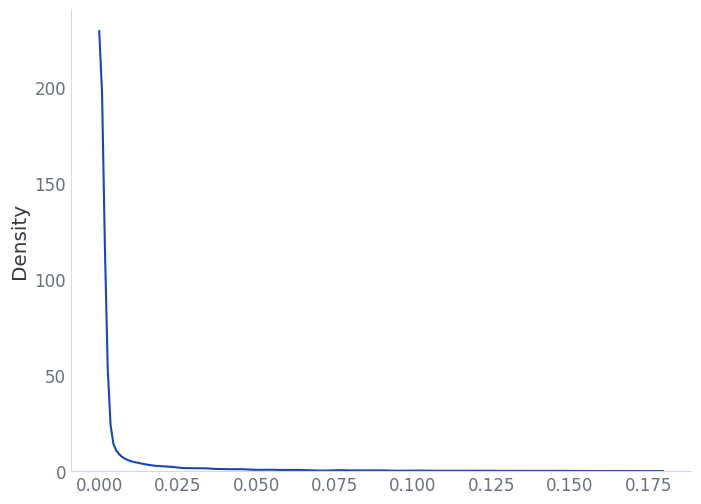

In [18]:
from avid.dataset import load_file

data = load_file(config, 0)
sns.kdeplot(data.density[0:5, ...].astype(jnp.float32).reshape(-1), cut=0)

In [19]:
batch = load_file(config, 0)
b1 = batch.density[0, ...].astype(jnp.float32)

plot(b1[..., 0].reshape(-1))

In [20]:
import einops as ein
# patchify = params['im_embed']['inner']['Patchify_0']['patch_proj']['kernel']
# patchify = patchify.reshape(3, 3, 3, 64, 256)
# patch_mean = ein.reduce(jnp.abs(patchify)[..., [2], :], 'nx ny nz chan out -> nx ny nz', 'mean')
# patches = ein.repeat(patch_mean, 'nx ny nz -> (nx r1) (ny r2) (nz r3)', r1=8, r2=8, r3=8)
# plot(patches.reshape(-1), thresh=0)

In [30]:
from avid.dataset import dataloader

num_test, test_dl = dataloader(config, split='test')

In [31]:
from avid.augmentations import randomly_augment


test_preds = []
batches = []
for batch in test_dl:
    batches.append(batch)
    test_preds.append(model(batch, training=False))

aug_preds = []
aug_batches = []

aug_rng = np.random.default_rng(413)
for batch in batches:
    aug_batch = randomly_augment(batch, True, True, True, config.voxelizer.n_grid, rng=aug_rng)
    aug_batches.append(aug_batch)
    aug_preds.append(model(aug_batch, training=False))

MAE:	0.0928
RMSE:	0.1319
Equiv:	0.05677


Text(0, 0.5, 'Actual')

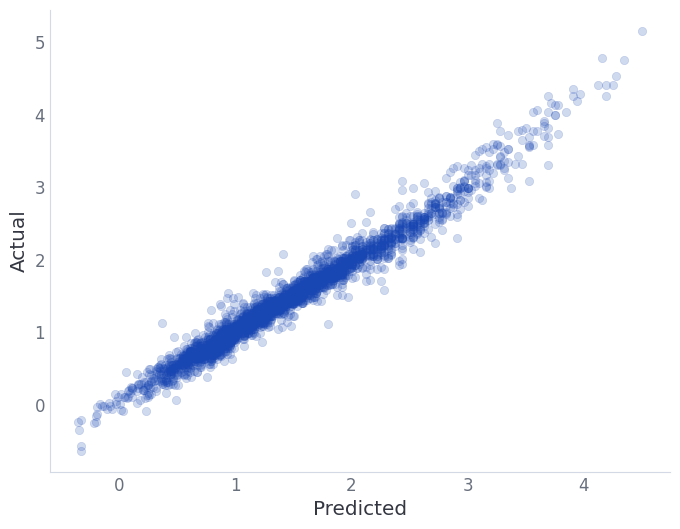

In [32]:
yhat = jnp.stack(test_preds).astype(jnp.float32).reshape(-1)
aug_yhat = jnp.stack(aug_preds).astype(jnp.float32).reshape(-1)
y = jnp.stack([batch.e_form for batch in batches]).astype(jnp.float32).reshape(-1)
aug_y = jnp.stack([batch.e_form for batch in aug_batches]).astype(jnp.float32).reshape(-1)
print('MAE:\t{:.4f}'.format(jnp.mean(jnp.abs(yhat - y))))
print('RMSE:\t{:.4f}'.format(jnp.sqrt(jnp.mean(jnp.square(yhat - y)))))
print('Equiv:\t{:.4g}'.format(jnp.mean(jnp.abs(aug_yhat - yhat))))
sns.scatterplot(x=yhat, y=y, ec=None, alpha=0.2)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
sns.displot(aug_yhat - yhat)

In [ ]:
from bokeh.models import (
    ColumnDataSource,
    CDSView,
    LinearColorMapper,
    LogColorMapper,
    ColorBar,
    BasicTicker,
    BooleanFilter
)
from bokeh.plotting import figure, output_file
from bokeh.io import show as show_
from bokeh.sampledata.periodic_table import elements
from bokeh.transform import dodge
from matplotlib.colors import Normalize, LogNorm, to_hex
from matplotlib.cm import (
    ScalarMappable,
)
from pandas import options
from typing import List
import warnings


def plotter(
    values,
    show: bool = True,
    output_filename: str = None,
    width: int = 1050,
    cmap: str = "plasma",
    alpha: float = 0.65,
    extended: bool = True,
    periods_remove: List[int] = None,
    groups_remove: List[int] = None,
    log_scale: bool = False,
    cbar_height: float = None,
    cbar_standoff: int = 12,
    cbar_fontsize: int = 14,
    blank_color: str = "#c4c4c4",
    under_value: float = None,
    under_color: str = "#140F0E",
    over_value: float = None,
    over_color: str = "#140F0E",
    special_elements: List[str] = None,
    special_color: str = "#6F3023",
) -> figure:

    """
    Plot a heatmap over the periodic table of elements.

    Parameters
    ----------
    filename : str
        Path to the .csv file containing the data to be plotted.
    show : str
        If True, the plot will be shown.
    output_filename : str
        If not None, the plot will be saved to the specified (.html) file.
    width : float
        Width of the plot.
    cmap : str
        plasma, inferno, viridis, magma, cividis, turbo
    alpha : float
        Alpha value (transparency).
    extended : bool
        If True, the lanthanoids and actinoids will be shown.
    periods_remove : List[int]
        Period numbers to be removed from the plot.
    groups_remove : List[int]
        Group numbers to be removed from the plot.
    log_scale : bool
        If True, the colorbar will be logarithmic.
    cbar_height : int
        Height of the colorbar.
    cbar_standoff : int
        Distance between the colorbar and the plot.
    cbar_fontsize : int
        Fontsize of the colorbar label.
    blank_color : str
        Hexadecimal color of the elements without data.
    under_value : float
        Values <= under_value will be colored with under_color.
    under_color : str
        Hexadecimal color to be used for the lower bound color.
    over_value : float
        Values >= over_value will be colored with over_color.
    under_color : str
        Hexadecial color to be used for the upper bound color.
    special_elements: List[str]
        List of elements to be colored with special_color.
    special_color: str
        Hexadecimal color to be used for the special elements.

    Returns
    -------
    figure
        Bokeh figure object.
    """

    options.mode.chained_assignment = None

    cmap = rp.mpl_sequential
    bokeh_palette = rp.list_sequential

    # Define number of and groups
    period_label = ["1", "2", "3", "4", "5", "6", "7"]
    group_range = [str(x) for x in range(1, 19)]

    # Remove any groups or periods
    if groups_remove:
        for gr in groups_remove:
            gr = gr.strip()
            group_range.remove(str(gr))
    if periods_remove:
        for pr in periods_remove:
            pr = pr.strip()
            period_label.remove(str(pr))

    # Read in data from CSV file
    data_elements = spec_df.index
    data_list = values
    data = [float(i) for i in data_list]

    if len(data) != len(data_elements):
        raise ValueError("Unequal number of atomic elements and data points")

    if extended:
        period_label.append("blank")
        period_label.append("La")
        period_label.append("Ac")


    count = 0
    for i in range(56, 70):
        elements.loc[i, 'period'] = "La"
        elements.loc[i, 'group'] = str(count + 4)
        count += 1

    count = 0
    for i in range(88, 102):
        elements.loc[i, 'period'] = "Ac"
        elements.loc[i, 'group'] = str(count + 4)
        count += 1


    # Define matplotlib and bokeh color map
    if log_scale:
        for datum in data:
            if datum < 0:
                raise ValueError(
                    f"Entry for element {datum} is negative but log-scale is selected"
                )
        color_mapper = LogColorMapper(
            palette=bokeh_palette, low=min(data), high=max(data)
        )
        norm = LogNorm(vmin=min(data), vmax=max(data))
    else:
        color_mapper = LinearColorMapper(
            palette=bokeh_palette, low=min(data), high=max(data)
        )
        norm = Normalize(vmin=min(data), vmax=max(data))
    color_scale = ScalarMappable(norm=norm, cmap=cmap).to_rgba(data, alpha=None)

    # Set blank color
    color_list = [blank_color] * len(elements)

    # Compare elements in dataset with elements in periodic table
    for i, data_element in enumerate(data_elements):
        element_entry = elements.symbol[
            elements.symbol.str.lower() == data_element.lower()
        ]
        if element_entry.empty == False:
            element_index = element_entry.index[0]
        else:
            warnings.warn("Invalid chemical symbol: " + data_element)
        if color_list[element_index] != blank_color:
            warnings.warn("Multiple entries for element " + data_element)
        elif under_value is not None and data[i] <= under_value:
            color_list[element_index] = under_color
        elif over_value is not None and data[i] >= over_value:
            color_list[element_index] = over_color
        else:
            color_list[element_index] = to_hex(color_scale[i])

    if special_elements:
        for k, v in elements["symbol"].iteritems():
            if v in special_elements:
                color_list[k] = special_color

    # Define figure properties for visualizing data
    source = ColumnDataSource(
        data=dict(
            group=[str(x) for x in elements["group"]],
            period=[str(y) for y in elements["period"]],
            sym=elements["symbol"],
            atomic_number=elements["atomic number"],
            type_color=color_list,
        )
    )

    view = CDSView(filter=BooleanFilter([extended or period not in ['La', 'Ac'] for period in source.data['period']]))

    # Plot the periodic table
    p = figure(x_range=group_range, y_range=list(reversed(period_label)), tools="save")
    p.width = width
    p.outline_line_color = None
    p.background_fill_color = None
    p.border_fill_color = None
    p.toolbar_location = "above"
    p.rect("group", "period", 0.9, 0.9, source=source, alpha=alpha, color="type_color", view=view)
    p.axis.visible = False
    text_props = {
        "source": source,
        "angle": 0,
        "color": "black",
        "text_align": "left",
        "text_baseline": "middle",
    }
    x = dodge("group", -0.4, range=p.x_range)
    y = dodge("period", 0.3, range=p.y_range)
    p.text(
        x=x,
        y="period",
        text="sym",
        text_font_style="bold",
        text_font_size="16pt",
        view=view,
        **text_props,
    )
    p.text(x=x, y=y, text="atomic_number", text_font_size="11pt", view=view, **text_props)

    color_bar = ColorBar(
        color_mapper=color_mapper,
        ticker=BasicTicker(desired_num_ticks=10),
        border_line_color=None,
        label_standoff=cbar_standoff,
        location=(0, 0),
        orientation="vertical",
        scale_alpha=alpha,
        major_label_text_font_size=f"{cbar_fontsize}pt",
    )

    if cbar_height is not None:
        color_bar.height = cbar_height

    p.add_layout(color_bar, "right")
    p.grid.grid_line_color = None

    if output_filename:
        output_file(output_filename)

    if show:
        show_(p)

    return p

In [ ]:
from bokeh.io import output_notebook
output_notebook()

In [ ]:
from pymatgen.core import Element
from statistics import mean

specs = [Element(x) for x in spec_df.index]
plotter([element.electron_affinity for element in specs], extended=False, alpha=0.65, width=1000)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
comps = pca.fit_transform(spec_df.iloc[:64])

fig = plotter(comps.T[0], extended=False, alpha=0.65, width=1000)